The link to the data can be found here:

https://drive.google.com/file/d/1iwLiU0jOsBLaPt816Gy1etq2qaN_zLqw/view?usp=drive_link

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load Data
df = pd.read_csv("/content/drive/MyDrive/Joe's Data Science Data/Real-Time_Road_Conditions_20250115.csv")
df.head()

,id,sensor_id,Location Name,Location,timestamp,voltage_y,voltage_x,voltage_ratio,air_temp_secondary,temp_surface,...,friction_code_displayed,friction_code_measured,friction_value_displayed,friction_value_measured,dirty_lens_score,grip_text,relative_humidity,air_temp_primary,air_temp_tertiary,status_code
0,425864,1,11TH ST / 35 SVRD,POINT (-97.7324753 30.2703285),02/11/2022 03:53:16 PM,2559,2440,1.049,25.13,30.37,...,0,2,2.31,0.82,0,GOOD,34.06,25.29,44.31,-102
1,449960,1,11TH ST / 35 SVRD,POINT (-97.7324753 30.2703285),02/24/2022 08:45:12 AM,1498,768,1.951,-0.53,-0.53,...,23,23,0.35,0.35,4,FAIR,83.70,-0.67,18.11,-102
2,483164,1,11TH ST / 35 SVRD,POINT (-97.7324753 30.2703285),03/05/2022 07:52:57 AM,2735,2560,1.068,100.10,100.10,...,2,2,0.82,0.82,0,GOOD,101.00,-101.00,36.80,-102
3,510965,1,11TH ST / 35 SVRD,POINT (-97.7324753 30.2703285),03/13/2022 04:42:32 AM,2238,2129,1.051,5.27,100.10,...,2,2,0.82,0.82,0,GOOD,44.19,5.09,22.82,-102
4,416489,2,FM 2222 RD / LAKEWOOD DR,POINT (-97.7877274 30.3589134),02/06/2022 01:38:59 PM,2071,2350,0.881,13.15,24.23,...,2,2,0.80,0.80,2,GOOD,35.20,12.77,25.03,101


In [4]:
df.columns

Index(['id', 'sensor_id', 'Location Name', 'Location', 'timestamp',
       'voltage_y', 'voltage_x', 'voltage_ratio', 'air_temp_secondary',
       'temp_surface', 'condition_code_displayed', 'condition_code_measured',
       'condition_text_displayed', 'condition_text_measured',
       'friction_code_displayed', 'friction_code_measured',
       'friction_value_displayed', 'friction_value_measured',
       'dirty_lens_score', 'grip_text', 'relative_humidity',
       'air_temp_primary', 'air_temp_tertiary', 'status_code'],
      dtype='object')

In [5]:
## all columns to lowercare
df.columns = df.columns.str.lower()
#renaming location column
df.rename(columns={'location name': 'location_name'}, inplace=True)
#renamin gthe 2222 location
# Check if the column name is correct, it might have spaces or different capitalization.
# Replacing the original value with the intended value.
df['location_name'] = df['location_name'].replace('2222 RD / LAKEWOOD DR', 'FM 2222 RD / LAKEWOOD DR')

In [6]:
## all columns to lowercare
df.columns = df.columns.str.lower()
#renaming location column
df.rename(columns={'location name': 'location_name'}, inplace=True)
#renamin gthe 2222 location
df['location_name'] = df['location_name'].replace('2222 RD / LAKEWOOD DR', 'FM 2222 RD / LAKEWOOD DR')
#dropped a few columns
#df = df.drop(columns= ["id", "location"]) ## dropped Id it is too specific to be of use
#converted to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce', format='%m/%d/%Y %I:%M:%S %p')


In [7]:
## cleaning of condition text
df['condition_text_displayed']= df['condition_text_displayed'].str.strip()
df['condition_text_displayed'].unique()

array(['UNK', 'SN1', 'DRY', 'WT1', 'WT2', 'MAX', 'IC1', 'WT3', 'IC2',
       'ERR'], dtype=object)

In [8]:
#cleaning of condition text measured
df['condition_text_measured'] = df['condition_text_measured'].str.strip()
df['condition_text_measured'].unique()

array(['DRY', 'SN1', 'WT1', 'WT2', 'MAX', 'IC1', 'WT3', 'IC2', 'UNK',
       'ERR'], dtype=object)

In [9]:
# Cleaning of grip text
df['grip_text']= df['grip_text'].str.strip()
df['grip_text'].unique()

array(['GOOD', 'FAIR', 'POOR'], dtype=object)

In [10]:
df_group_year_month = df.groupby(by= ['sensor_id','location_name', df['timestamp'].dt.year, df['timestamp'].dt.month]).agg({'temp_surface': 'mean','air_temp_secondary': 'mean', 'air_temp_primary': 'mean', 'air_temp_tertiary': 'mean', 'relative_humidity': 'mean', 'friction_value_measured' : 'mean', 'voltage_x': 'mean', 'voltage_y': 'mean'})
df_group_year_month


temp_surface  \
sensor_id location_name                     timestamp timestamp                 
1         11TH ST / 35 SVRD                 2020      9             74.960292   
                                                      11            12.998916   
                                                      12            13.183082   
                                            2021      1             13.234989   
                                                      2             12.381064   
...                                                                       ...   
4         BEN WHITE BLVD SVRD / BANISTER LN 2024      9             32.303628   
                                                      10            28.940177   
                                                      11            21.436563   
                                                      12            16.736177   
                                            2025      1             10.252786   

                                                                 air_temp_secondary  \
sensor_id location_name                     timestamp timestamp                       
1         11TH ST / 35 SVRD                 2020      9                   74.863406   
                                                      11                  10.314418   
                                                      12                  12.931534   
                                            2021      1                   12.648502   
                                                      2                   11.073198   
...                                                                             ...   
4         BEN WHITE BLVD SVRD / BANISTER LN 2024      9                   28.367463   
                                                      10                  26.011237   
                                                      11                  19.753092   
                                                      12                  15.786209   
                                            2025      1                    9.037048   

                                                                 air_temp_primary  \
sensor_id location_name                     timestamp timestamp                     
1         11TH ST / 35 SVRD                 2020      9                -58.884137   
                                                      11                10.326667   
                                                      12                13.008676   
                                            2021      1                 12.730911   
                                                      2                 11.116008   
...                                                                           ...   
4         BEN WHITE BLVD SVRD / BANISTER LN 2024      9                 28.178844   
                                                      10                25.834294   
                                                      11                19.550928   
                                                      12                15.571735   
                                            2025      1                  8.757610   

                                                                 air_temp_tertiary  \
sensor_id location_name                     timestamp timestamp                      
1         11TH ST / 35 SVRD                 2020      9                  44.707443   
                                                      11                 30.347443   
                                                      12                 32.253255   
                                            2021      1                  31.994979   
                                                      2                  30.182258   
...                                                                            ...   
4         BEN WHITE BLVD SVRD / BANISTER LN 2024      9                  38.843052   

In [11]:
## df of sensor that needs calibration
df[df['status_code']==-102]
# now look at rows where sureface and air temperatures vary for more than 20 degrees and fill with mean
## look at how often each sensor has code -102, may give insight of accuracy of codition reported

,id,sensor_id,location_name,location,timestamp,voltage_y,voltage_x,voltage_ratio,air_temp_secondary,temp_surface,...,friction_code_displayed,friction_code_measured,friction_value_displayed,friction_value_measured,dirty_lens_score,grip_text,relative_humidity,air_temp_primary,air_temp_tertiary,status_code
0,425864,1,11TH ST / 35 SVRD,POINT (-97.7324753 30.2703285),2022-02-11 15:53:16,2559,2440,1.049,25.13,30.37,...,0,2,2.31,0.82,0,GOOD,34.06,25.29,44.31,-102
1,449960,1,11TH ST / 35 SVRD,POINT (-97.7324753 30.2703285),2022-02-24 08:45:12,1498,768,1.951,-0.53,-0.53,...,23,23,0.35,0.35,4,FAIR,83.70,-0.67,18.11,-102
2,483164,1,11TH ST / 35 SVRD,POINT (-97.7324753 30.2703285),2022-03-05 07:52:57,2735,2560,1.068,100.10,100.10,...,2,2,0.82,0.82,0,GOOD,101.00,-101.00,36.80,-102
3,510965,1,11TH ST / 35 SVRD,POINT (-97.7324753 30.2703285),2022-03-13 04:42:32,2238,2129,1.051,5.27,100.10,...,2,2,0.82,0.82,0,GOOD,44.19,5.09,22.82,-102
5,434658,1,11TH ST / 35 SVRD,POINT (-97.7324753 30.2703285),2022-02-16 11:09:17,2201,2170,1.015,19.53,20.51,...,2,2,0.82,0.82,0,GOOD,76.59,19.72,36.92,-102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352906,3342147,1,11TH ST / 35 SVRD,POINT (-97.732475 30.270329),2024-01-03 11:52:19,1702,1667,1.021,100.10,100.10,...,0,3,2.31,0.80,4,GOOD,101.00,-101.00,28.80,-102
3352913,3342068,1,11TH ST / 35 SVRD,POINT (-97.732475 30.270329),2024-01-03 11:25:35,1604,1556,1.031,100.10,100.10,...,4,4,0.77,0.77,4,GOOD,101.00,-101.00,28.81,-102
3352921,3337397,1,11TH ST / 35 SVRD,POINT (-97.732475 30.270329),2024-01-02 08:12:00,1988,1922,1.034,100.10,100.10,...,2,2,0.82,0.82,0,GOOD,101.00,-101.00,25.64,-102
3352925,3359784,1,11TH ST / 35 SVRD,POINT (-97.732475 30.270329),2024-01-08 17:12:20,1880,1796,1.047,100.10,100.10,...,3,3,0.80,0.80,4,GOOD,101.00,-101.00,34.31,-102


In [12]:
## drops all text columns
column_types = df.dtypes
string_columns = [col for col, dtype in column_types.items() if dtype == 'object']
df_no_strings = df.drop(columns= string_columns)
## need to check why condition_code_displayed is automatically dropped, not a text column
## if you want to add it may have to create columns for each code first these are all discrete reportings
df_no_strings= df_no_strings.drop(columns= ['sensor_id','condition_code_measured', 'friction_code_displayed', 'friction_code_measured','dirty_lens_score'])
print(df_no_strings.columns)
## correlation map
corr = df_no_strings.corr()
corr.style.background_gradient(cmap='coolwarm')

Index(['id', 'timestamp', 'voltage_y', 'voltage_x', 'voltage_ratio',
       'air_temp_secondary', 'temp_surface', 'condition_code_displayed',
       'friction_value_displayed', 'friction_value_measured',
       'relative_humidity', 'air_temp_primary', 'air_temp_tertiary',
       'status_code'],
      dtype='object')


,id,timestamp,voltage_y,voltage_x,voltage_ratio,air_temp_secondary,temp_surface,condition_code_displayed,friction_value_displayed,friction_value_measured,relative_humidity,air_temp_primary,air_temp_tertiary,status_code
id,1.000000,0.981759,-0.298532,-0.204771,-0.161452,-0.034059,-0.068110,0.026965,-0.157780,-0.169308,0.039698,0.067647,-0.067876,0.375708
timestamp,0.981759,1.000000,-0.309121,-0.206903,-0.185891,-0.019818,-0.049139,0.028502,-0.181323,-0.183718,0.036953,0.067375,-0.076826,0.468919
voltage_y,-0.298532,-0.309121,1.000000,0.952420,-0.149680,0.166503,0.192131,-0.384898,0.385862,0.682478,-0.142988,-0.146423,0.111062,-0.307600
voltage_x,-0.204771,-0.206903,0.952420,1.000000,-0.357173,0.191587,0.214819,-0.453459,0.399018,0.757506,-0.171535,-0.132579,0.143119,-0.240428
voltage_ratio,-0.161452,-0.185891,-0.149680,-0.357173,1.000000,-0.014338,-0.019197,0.429186,-0.127229,-0.400774,0.157686,-0.110955,-0.117389,-0.187845
air_temp_secondary,-0.034059,-0.019818,0.166503,0.191587,-0.014338,1.000000,0.928607,-0.141159,0.326396,0.191792,0.203033,-0.659983,0.477677,-0.481819
temp_surface,-0.068110,-0.049139,0.192131,0.214819,-0.019197,0.928607,1.000000,-0.151600,0.307497,0.204874,0.081092,-0.571722,0.526712,-0.493102
condition_code_displayed,0.026965,0.028502,-0.384898,-0.453459,0.429186,-0.141159,-0.151600,1.000000,-0.418199,-0.577844,0.188029,0.024292,-0.181154,0.082205
friction_value_displayed,-0.157780,-0.181323,0.385862,0.399018,-0.127229,0.326396,0.307497,-0.418199,1.000000,0.484242,0.017889,-0.317021,0.134918,-0.432662
friction_value_measured,-0.169308,-0.183718,0.682478,0.757506,-0.400774,0.191792,0.204874,-0.577844,0.484242,1.000000,-0.160490,-0.146426,0.141059,-0.274885


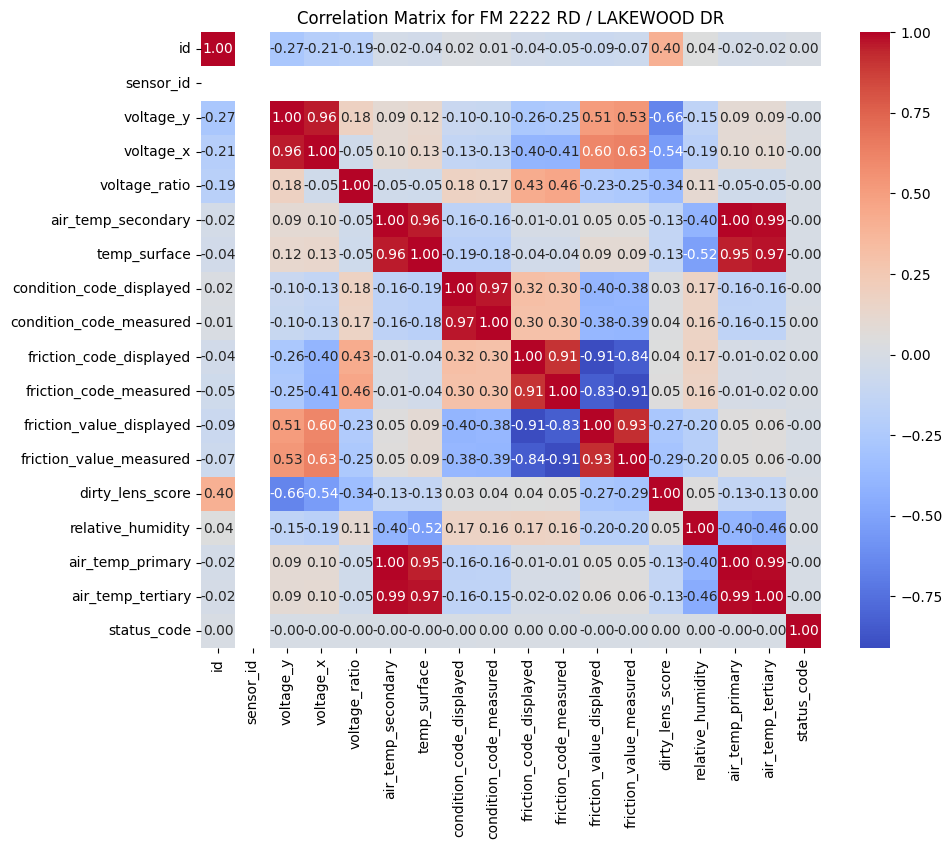

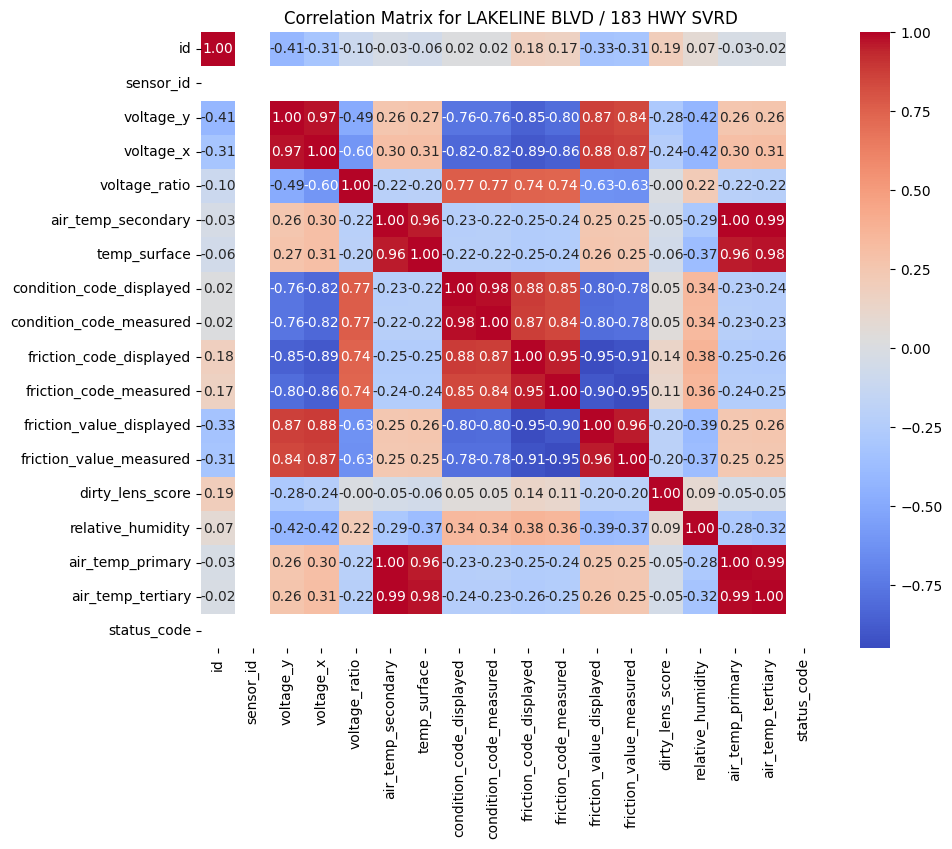

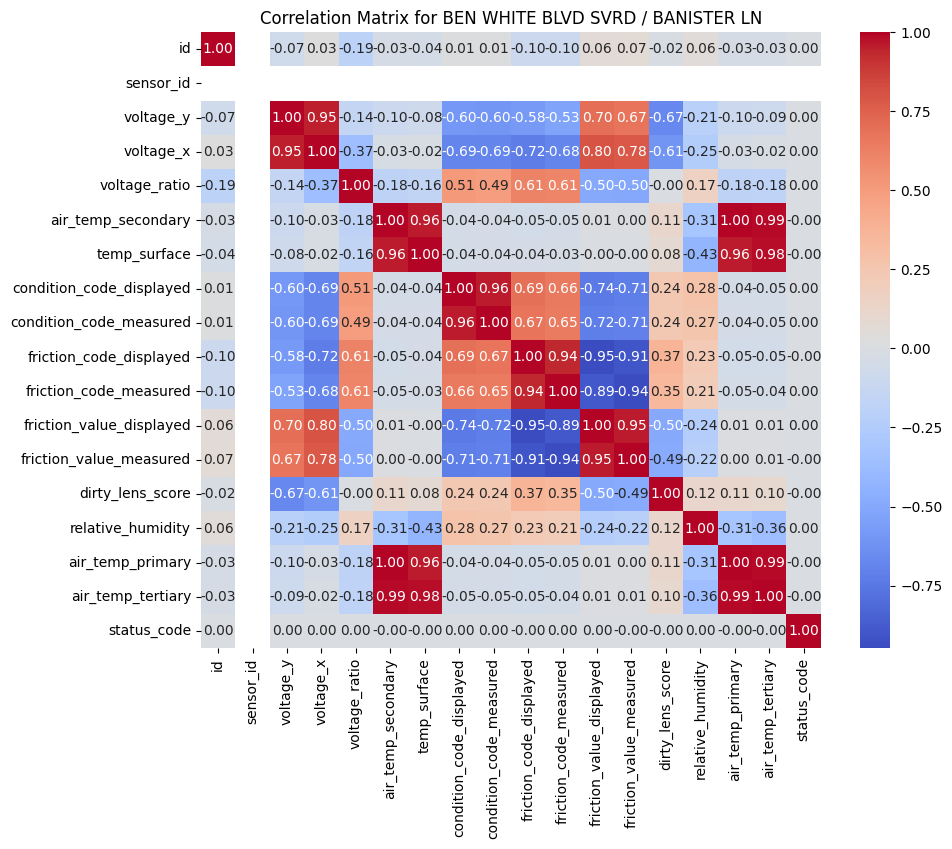

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

for location in df['location_name'].unique():
  if location != '11TH ST / 35 SVRD':
    location_df = df[df['location_name'] == location]

    # Select only numeric columns for correlation
    numeric_cols = location_df.select_dtypes(include=np.number).columns

    if len(numeric_cols) > 1:  # Check if there are at least 2 numeric columns
      location_corr = location_df[numeric_cols].corr()

      plt.figure(figsize=(10, 8))
      sns.heatmap(location_corr, annot=True, cmap='coolwarm', fmt=".2f")
      plt.title(f'Correlation Matrix for {location}')
      plt.show()
    else:
      print(f"Not enough numeric data for correlation analysis in location {location}")


In [14]:
# Calculate the average humidity for each location excluding '11TH ST / 35 SVRD'
average_humidity_by_location = df[df['location_name'] != '11TH ST / 35 SVRD'].groupby('location_name')['relative_humidity'].mean()

average_humidity_by_location


,relative_humidity
location_name,
BEN WHITE BLVD SVRD / BANISTER LN,67.178296
FM 2222 RD / LAKEWOOD DR,65.375891
LAKELINE BLVD / 183 HWY SVRD,64.314610


<Axes: ylabel='Frequency'>

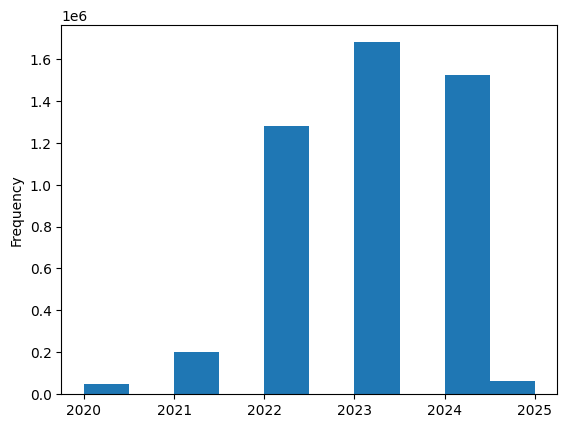

In [15]:
df['timestamp'].dt.year.plot(kind='hist')

<ipython-input-16-2041bc53cd87>:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


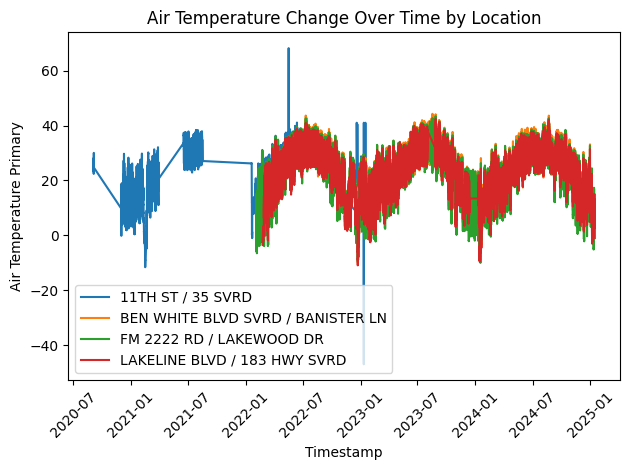

In [16]:
#This graph shows the effect of uncalibrated lenses on the reading (which is why the 11th st location looks so wierd)
import matplotlib.pyplot as plt

# Filter out values outside the specified range
filtered_df = df[(df['air_temp_primary'] >= -50) & (df['air_temp_primary'] <= 81)]

# Group data by location and timestamp
grouped = filtered_df.groupby(['location_name', 'timestamp'])['air_temp_primary'].mean().reset_index()

# Create the line chart
for location in grouped['location_name'].unique():
    location_data = grouped[grouped['location_name'] == location]
    plt.plot(location_data['timestamp'], location_data['air_temp_primary'], label=location)

plt.xlabel('Timestamp')
plt.ylabel('Air Temperature Primary')
plt.title('Air Temperature Change Over Time by Location')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

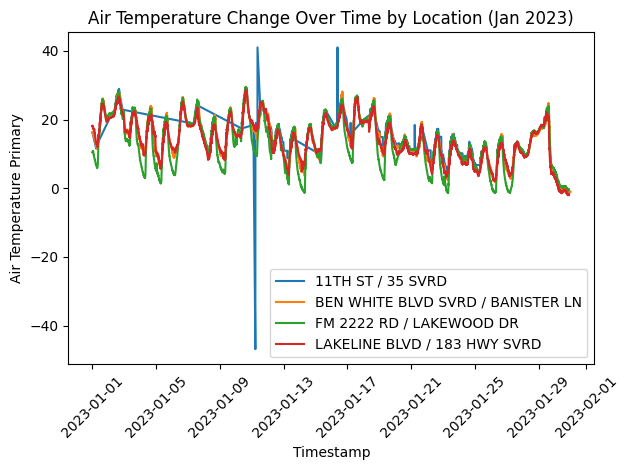

In [17]:
import matplotlib.pyplot as plt

# Filter for the specified date range
start_date = '2023-01-01'
end_date = '2023-01-31'
filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]

# Filter out values outside the specified range
filtered_df = filtered_df[(filtered_df['air_temp_primary'] >= -50) & (filtered_df['air_temp_primary'] <= 70)]

# Group data by location and timestamp
grouped = filtered_df.groupby(['location_name', 'timestamp'])['air_temp_primary'].mean().reset_index()

# Create the line chart
for location in grouped['location_name'].unique():
    location_data = grouped[grouped['location_name'] == location]
    plt.plot(location_data['timestamp'], location_data['air_temp_primary'], label=location)

plt.xlabel('Timestamp')
plt.ylabel('Air Temperature Primary')
plt.title('Air Temperature Change Over Time by Location (Jan 2023)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

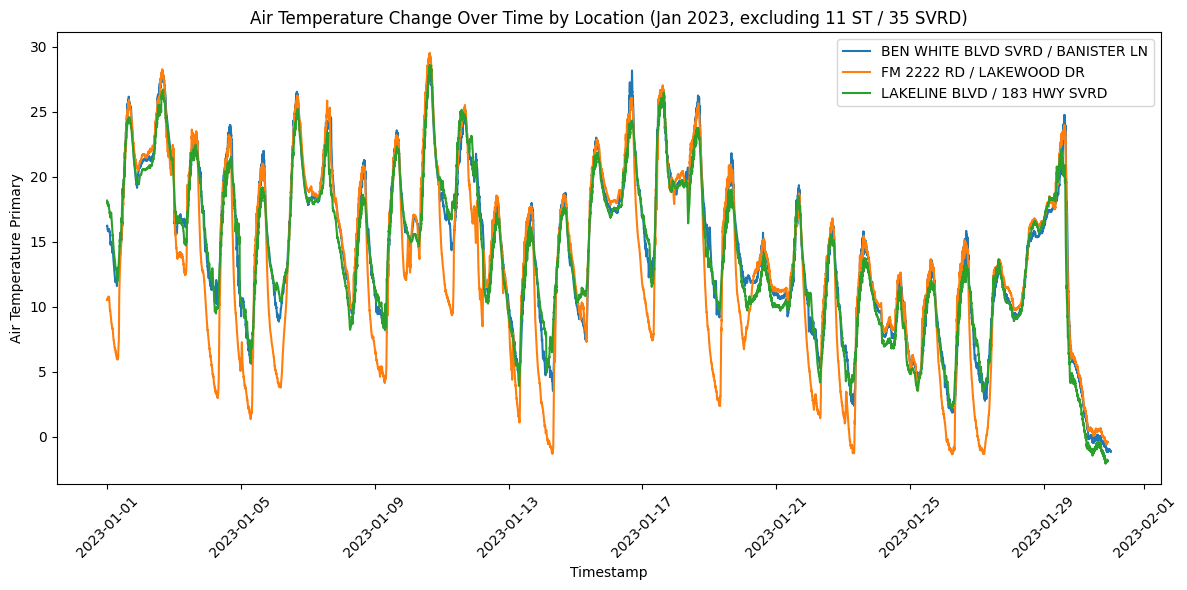

In [18]:
# Filter for the specified date range and exclude the specified location
start_date = '2023-01-01'
end_date = '2023-01-31'
filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date) & (df['location_name'] != '11TH ST / 35 SVRD')]

# Filter out values outside the specified range
filtered_df = filtered_df[(filtered_df['air_temp_primary'] >= -50) & (filtered_df['air_temp_primary'] <= 70)]

# Group data by location and timestamp
grouped = filtered_df.groupby(['location_name', 'timestamp'])['air_temp_primary'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better visibility
colors = {
    'BEN WHITE BLVD SVRD / BANISTER LN': 'green',
    'FM 2222 RD / LAKEWOOD DR': 'blue',
    'LAKELINE BLVD / 183 HWY SVRD': 'orange'
}
for location in grouped['location_name'].unique():
    location_data = grouped[grouped['location_name'] == location]
    plt.plot(location_data['timestamp'], location_data['air_temp_primary'], label=location)

plt.xlabel('Timestamp')
plt.ylabel('Air Temperature Primary')
plt.title('Air Temperature Change Over Time by Location (Jan 2023, excluding 11 ST / 35 SVRD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [19]:
#Code to change each location to its cardinal position in Austin
location_mapping = {
    'LAKELINE BLVD / 183 HWY SVRD': 'NORTH AUSTIN',
    'FM 2222 RD / LAKEWOOD DR': 'NORTH WEST AUSTIN',
    '11TH ST / 35 SVRD': 'DOWNTOWN',
    'BEN WHITE BLVD SVRD / BANISTER LN': 'SOUTH AUSTIN'
}

<Figure size 1200x600 with 0 Axes>

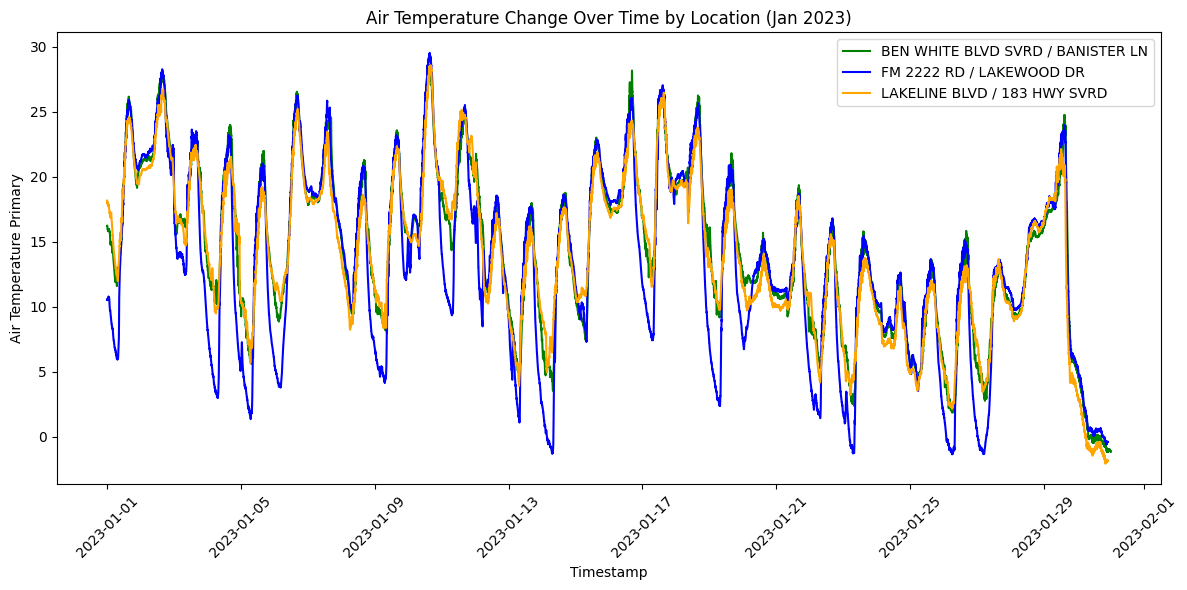

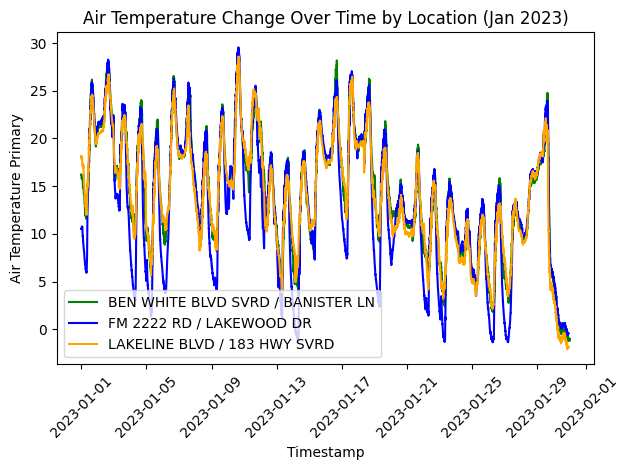

In [20]:
# Filter for the specified date range and exclude the specified location
start_date = '2023-01-01'
end_date = '2023-01-31'
filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date) & (df['location_name'] != '11TH ST / 35 SVRD')]

# Filter out values outside the specified range
filtered_df = filtered_df[(filtered_df['air_temp_primary'] >= -50) & (filtered_df['air_temp_primary'] <= 70)]

# Group data by location and timestamp
grouped = filtered_df.groupby(['location_name', 'timestamp'])['air_temp_primary'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better visibility

# Filter for the specified date range and exclude the specified location
start_date = '2023-01-01'
end_date = '2023-01-31'
filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date) & (df['location_name'] != '11TH ST / 35 SVRD')]

# Filter out values outside the specified range
filtered_df = filtered_df[(filtered_df['air_temp_primary'] >= -50) & (filtered_df['air_temp_primary'] <= 70)]

# Group data by location and timestamp
grouped = filtered_df.groupby(['location_name', 'timestamp'])['air_temp_primary'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better visibility
colors = {
    'BEN WHITE BLVD SVRD / BANISTER LN': 'green',
    'FM 2222 RD / LAKEWOOD DR': 'blue',
    'LAKELINE BLVD / 183 HWY SVRD': 'orange'
}
for location, color in colors.items():
    location_data = grouped[grouped['location_name'] == location]
    if not location_data.empty:  # Check if the DataFrame is not empty
        plt.plot(location_data['timestamp'], location_data['air_temp_primary'], color=color, label=location)

plt.xlabel('Timestamp')
plt.ylabel('Air Temperature Primary')
plt.title('Air Temperature Change Over Time by Location (Jan 2023)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
for location, color in colors.items():
    location_data = grouped[grouped['location_name'] == location]
    if not location_data.empty:  # Check if the DataFrame is not empty
        plt.plot(location_data['timestamp'], location_data['air_temp_primary'], color=color, label=location)

plt.xlabel('Timestamp')
plt.ylabel('Air Temperature Primary')
plt.title('Air Temperature Change Over Time by Location (Jan 2023)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

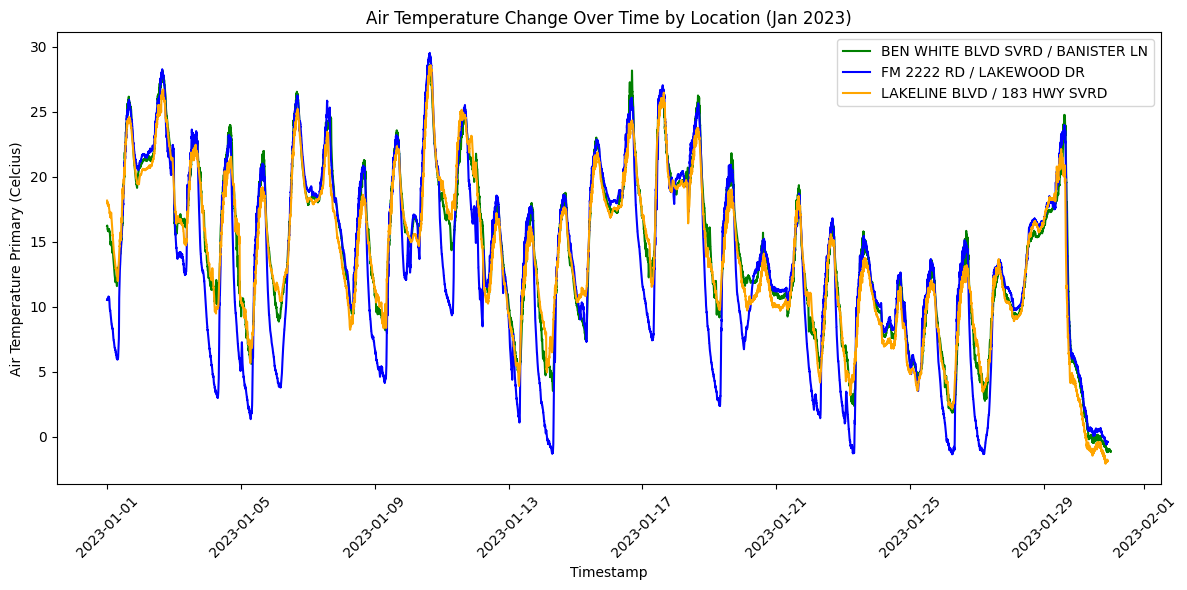

In [21]:
import matplotlib.pyplot as plt

# Create the line chart with custom colors for specific locations
plt.figure(figsize=(12, 6))
colors = {
    'BEN WHITE BLVD SVRD / BANISTER LN': 'green',
    'FM 2222 RD / LAKEWOOD DR': 'blue',
    'LAKELINE BLVD / 183 HWY SVRD': 'orange'
}

for location in grouped['location_name'].unique():
    location_data = grouped[grouped['location_name'] == location]
    color = colors.get(location, 'gray')  # Use gray as default color
    plt.plot(location_data['timestamp'], location_data['air_temp_primary'], label=location, color=color)

plt.xlabel('Timestamp')
plt.ylabel('Air Temperature Primary (Celcius)')
plt.title('Air Temperature Change Over Time by Location (Jan 2023)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

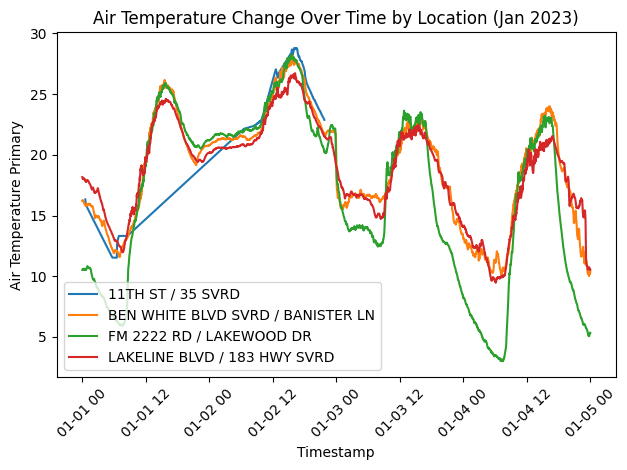

In [22]:
import matplotlib.pyplot as plt

# Filter for the specified date range
start_date = '2023-01-01'
end_date = '2023-01-05'
filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]

# Filter out values outside the specified range
filtered_df = filtered_df[(filtered_df['air_temp_primary'] >= -50) & (filtered_df['air_temp_primary'] <= 70)]

# Group data by location and timestamp
grouped = filtered_df.groupby(['location_name', 'timestamp'])['air_temp_primary'].mean().reset_index()

# Create the line chart
for location in grouped['location_name'].unique():
    location_data = grouped[grouped['location_name'] == location]
    plt.plot(location_data['timestamp'], location_data['air_temp_primary'], label=location)

plt.xlabel('Timestamp')
plt.ylabel('Air Temperature Primary')
plt.title('Air Temperature Change Over Time by Location (Jan 2023)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Above shows that 11th street sensor puts out wierd values, will need to look into

In [23]:
# Filter out temperatures of 100.1
filtered_df = df[df['air_temp_primary'] != 100.1]

# Group by location and calculate the average temperature
average_temps = filtered_df.groupby('location_name')['air_temp_primary'].mean()

# Display the results
average_temps

,air_temp_primary
location_name,
11TH ST / 35 SVRD,-31.668970
BEN WHITE BLVD SVRD / BANISTER LN,22.498350
FM 2222 RD / LAKEWOOD DR,22.118921
LAKELINE BLVD / 183 HWY SVRD,22.161531


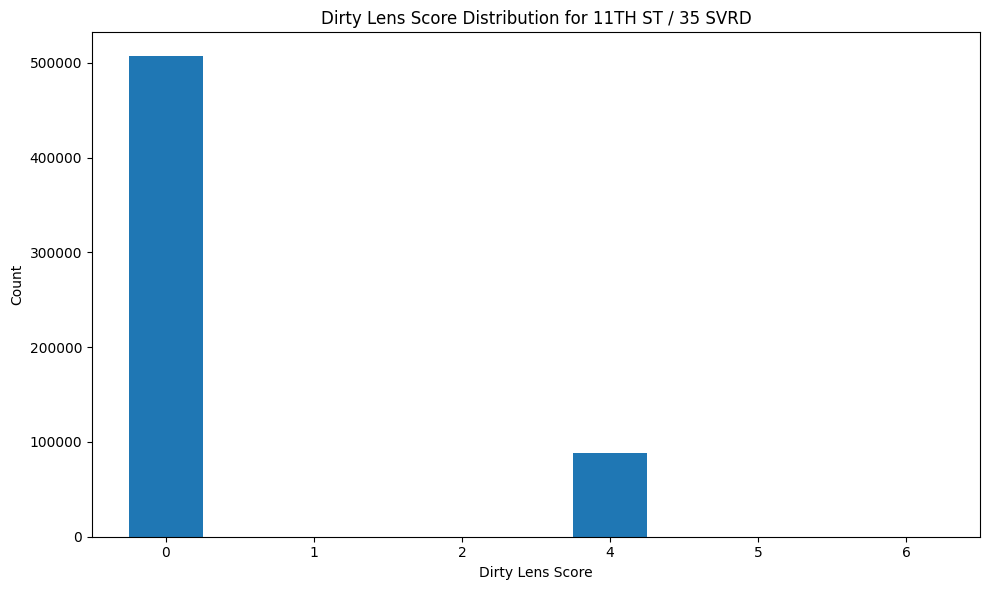

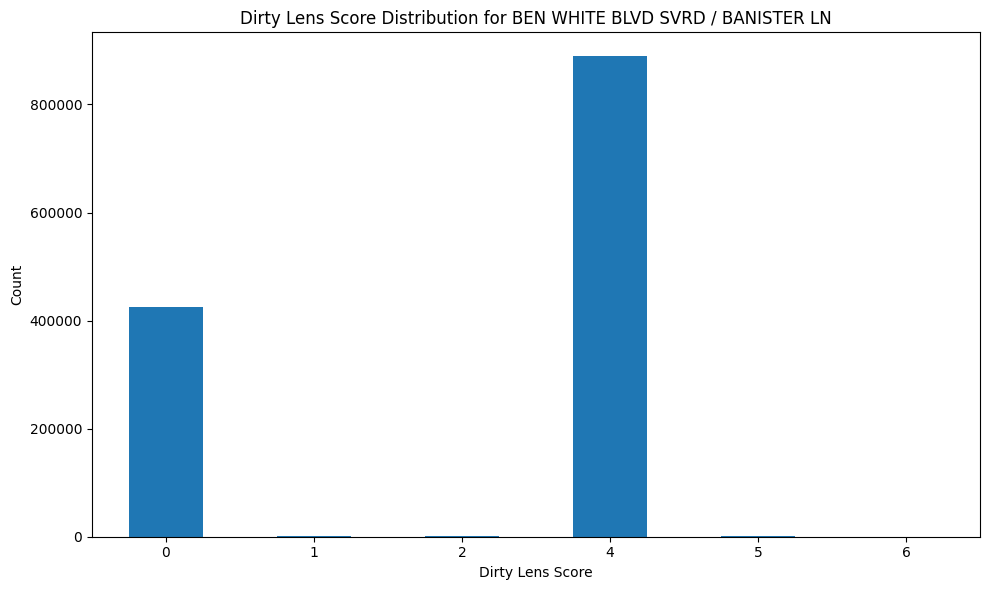

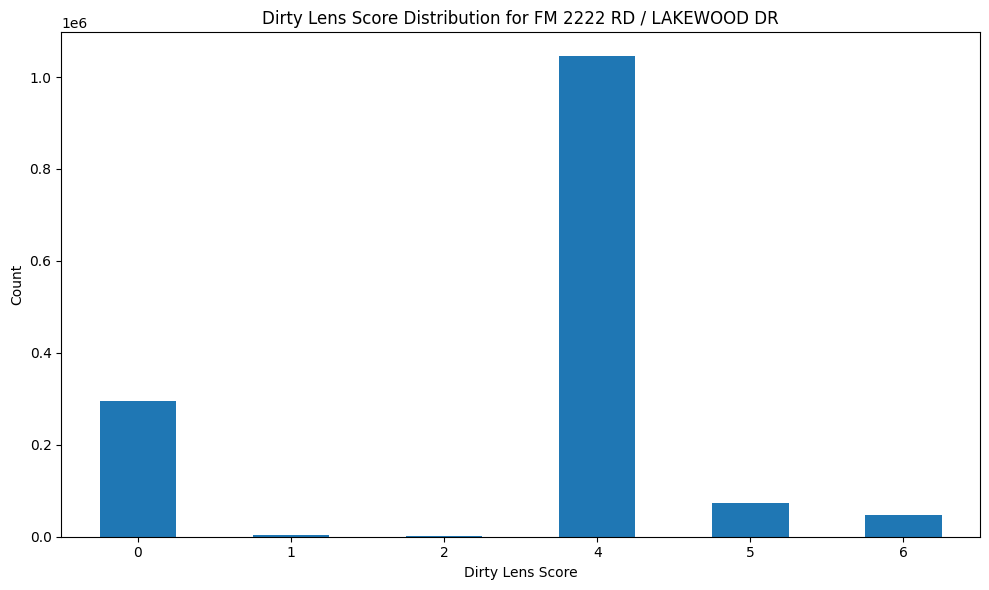

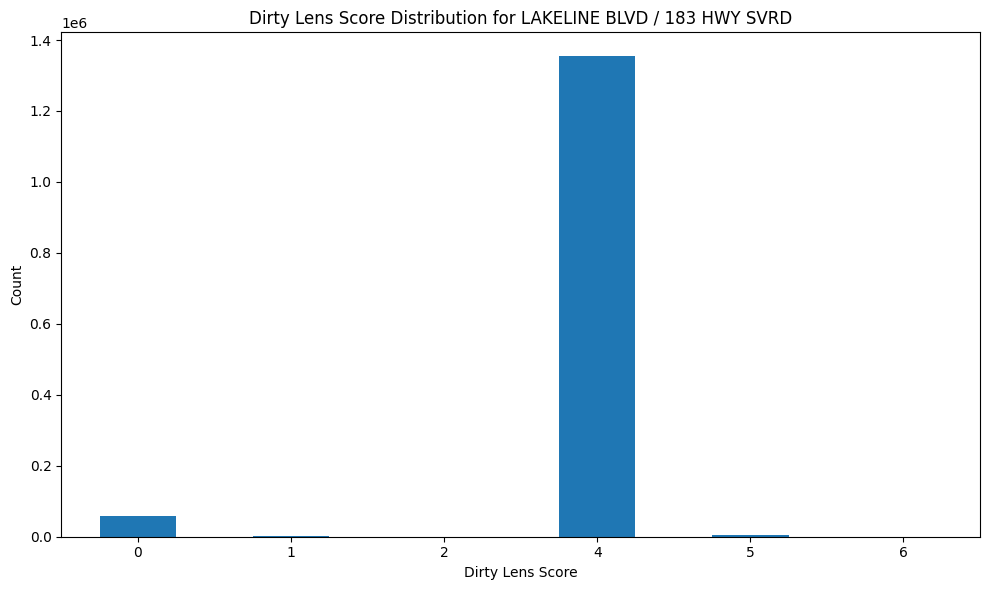

In [24]:
import matplotlib.pyplot as plt

# Group data by location and dirty_lens_score
grouped = df.groupby(['location_name', 'dirty_lens_score']).size().unstack(fill_value=0)

# Create bar charts for each location
for location in grouped.index:
    location_data = grouped.loc[location]
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    location_data.plot(kind='bar')
    plt.title(f'Dirty Lens Score Distribution for {location}')
    plt.xlabel('Dirty Lens Score')
    plt.ylabel('Count')
    plt.xticks(rotation=0)  # Keep x-axis labels horizontal
    plt.tight_layout()
    plt.show()

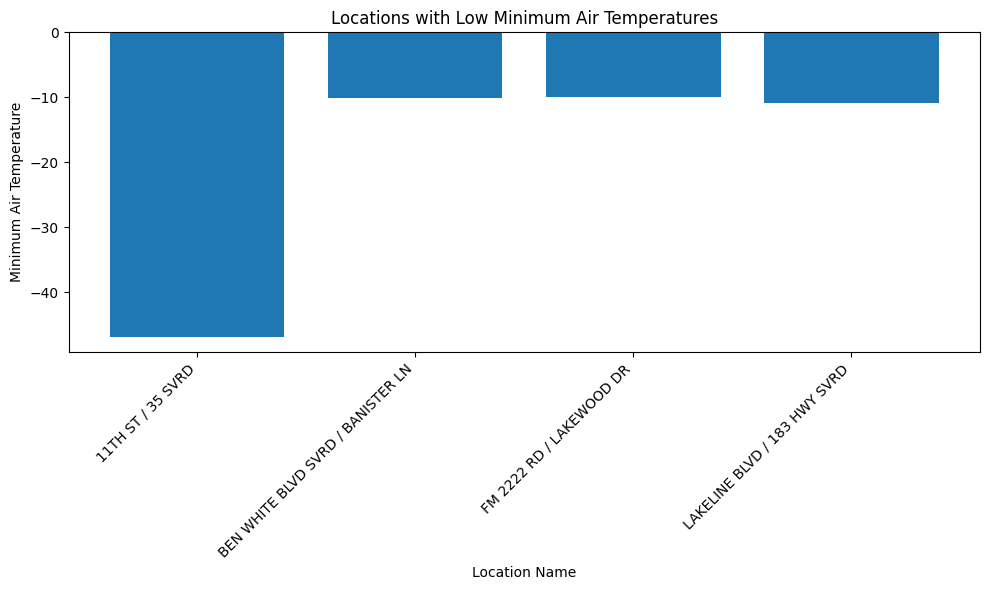

In [25]:
import matplotlib.pyplot as plt

# Filter out values of -101 and 100.1 (signifiers of error codes)
filtered_df = df[(df['air_temp_primary'] != -101) & (df['air_temp_primary'] != 100.1)]

# Group by location and find the minimum air temperature
min_temps = filtered_df.groupby('location_name')['air_temp_primary'].min()

# Find locations with minimum temperature below a threshold (e.g., 50)
low_temp_locations = min_temps[min_temps < 50]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(low_temp_locations.index, low_temp_locations.values)
plt.xlabel('Location Name')
plt.ylabel('Minimum Air Temperature')
plt.title('Locations with Low Minimum Air Temperatures')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [26]:
# Filter data for January 2023
january_data = df[(df['timestamp'] >= '2023-01-01') & (df['timestamp'] < '2023-02-01')]

# Group by location and calculate the average friction_value_displayed
average_friction_by_location = january_data.groupby('location_name')['friction_value_displayed'].mean()

average_friction_by_location

,friction_value_displayed
location_name,
11TH ST / 35 SVRD,1.003689
BEN WHITE BLVD SVRD / BANISTER LN,0.755490
FM 2222 RD / LAKEWOOD DR,0.673433
LAKELINE BLVD / 183 HWY SVRD,0.677334


In [27]:
# Filter data for December, January, and February
winter_months_data = df[df['timestamp'].dt.month.isin([12, 1, 2])]

# Group by location and calculate the average friction_value_displayed
average_friction_by_location = winter_months_data.groupby('location_name')['friction_value_displayed'].mean()

average_friction_by_location

,friction_value_displayed
location_name,
11TH ST / 35 SVRD,0.943013
BEN WHITE BLVD SVRD / BANISTER LN,0.737284
FM 2222 RD / LAKEWOOD DR,0.686506
LAKELINE BLVD / 183 HWY SVRD,0.678255


In [28]:
average_friction = df[df['location_name'] != '11TH ST / 35 SVRD'].groupby('location_name')['friction_value_displayed'].mean()
average_friction


,friction_value_displayed
location_name,
BEN WHITE BLVD SVRD / BANISTER LN,0.725423
FM 2222 RD / LAKEWOOD DR,0.689564
LAKELINE BLVD / 183 HWY SVRD,0.706649
